In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def gen_v(x):
    if x == 1: return "Too Little"
    if x == 2: return "Just Right"
    if x == 3: return "Too Much"
    return "Other"

def gen_p(x):
    if x == 1: return "Clinton"
    if x == 2: return "Trump"
    return "Other"

def gen_pv(x):
    if x <= 3: return "liberal"
    if x >= 5: return "conservative"
    if x == 4: return "moderate"
    return "other"

def plot_graph_3():
    fil_data = df[(df['pres16'] < 3) & (df['pres16'] > 0) & (df['polviews'] < 8)]

    lst = ['natspac','natenvir', 'natheal', 'natcity', 'natcrime', 
       'natdrug', 'nateduc', 'natrace', 'natarms', 
       'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 
       'natpark', 'natchld', 'natsci', 'natenrgy']

    cor = np.zeros([2, len(lst)])
    x1 = fil_data['polviews']
    x2 = fil_data['pres16']

    fil_data = fil_data[[*lst]]
    for i in range(len(lst)):
        cor[0][i] = x1.corr(fil_data[fil_data.columns[i]])
    
    for i in range(len(lst)):
        cor[1][i] = x2.corr(fil_data[fil_data.columns[i]])
    
    lst = ['Space Exploration','Environment Protection', 
       'Health', 'Big Cities', 'Crime Rate', 
       'Drug Addiction', 'Education', 'Blacks', 'Defense', 
       'Foreign Aid', 'Welfare', 'Boads', 'Social Security', 
       'Mass Transportation', 'Parks', 'Childcare', 
       'Scientific Research', 'Alternative Energy']
    
    m = pd.DataFrame(cor)
    m = m.rename(columns=dict(zip(range(len(lst)), lst)))
    m = m.rename(index={0: 'ideology', 1: 'president'})
    sns.heatmap(m.T, cmap="RdBu")
    plt.title('Graph 3, Correlation Heatmap about Budget')
    plt.show()

In [3]:
df = pd.read_stata('GSS2018.dta', 
                   convert_categoricals= False)
df['president'] = df['pres16'].apply(gen_p)
df['pviews'] = df['polviews'].apply(gen_pv)

# First Research Question


My research question is how to understand the fact that some liberals—including extreme liberals—voted for Trump, and some conservatives—including extreme conservatives—voted for Clinton. In the Lab Notebook, I explored a possible hypothesis; That is, liberal Trump supporters and conservative Clinton supporters may have quite different viewpoints on specific policy issues from their cohorts with similar ideologies. These differences are so important to their wellbeing that they feel the necessity to vote for a president who represents an ideology they don’t identify with.

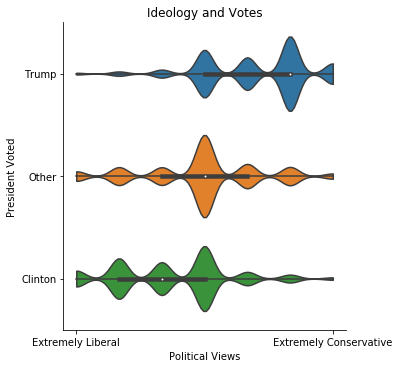

In [4]:
sns.catplot(x="polviews", y="president", kind="violin", bw=.15, cut=0, data=df)
plt.xticks([1, 7], ['Extremely Liberal', 'Extremely Conservative'])
plt.xlabel('Political Views')
plt.ylabel('President Voted')
plt.title('Ideology and Votes')
plt.show()

First, I investigate the levels of confidence they have in multiple institutions. In the GSS survey, the respondents were asked a few questions regarding how much confidence they have in the people running certain institutions. Their answers show that, liberal Trump supporters and conservative Clinton supporters do think quite differently from their cohorts. For example, as shown in **Graph 2**, liberals (approximately considered as liberal Clinton Supporters because they are the vast majority) in general have lower confidence in banks and financial institutions than conservatives (similarly, approximately considered as conservative Trump supporters). However, liberal Trump supporters have even more confidence in these institutions than conservative Trump supporters. One possible explanation is that, even though liberal Trump supporters might be strongly liberal in their social policy preferences, with significant interests in the financial sector, they had to vote for Trump to prioritize their personal interests. However, in this primary stage of research we cannot exclude the possibility of reverse casual inference: it might be that because they voted for Trump that they started to, influenced by Trump, give more confidence in the financial sector.

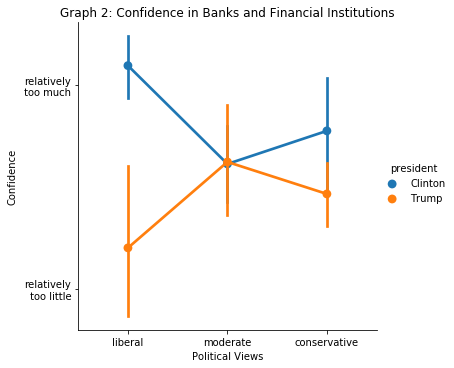

In [5]:
## exclude those who voted for other presidents or didn't vote.
fil_data = df[(df['pres16'] < 3) & (df['pres16'] > 0) & (df['polviews'] < 8)]
sns.catplot(x="pviews", y="confinan", hue="president", 
            order = ['liberal', 'moderate', 'conservative'], 
            kind="point", data = fil_data, hue_order = ['Clinton', 'Trump'])
plt.ylabel('Confidence')
plt.xlabel('Political Views')
plt.title('Graph 2: Confidence in Banks and Financial Institutions')
plt.yticks([1.7, 2.2], ['relatively\n too little', 'relatively\n too much'])
plt.show()

Second, I investigate how the respondents think about the government spending on specific policy issues. In the GSS survey, the respondents were asked a few questions regarding whether the government has spent too much money, too little money, or about the right amount on certain problems. **Graph 3** shows how people’s attitudes towards government spending are related to their ideologies and their preferences over presidents. The redder a cell is, the more Republicans/ Conservatives think that government’s spending is too little on this topic. The bluer a cell is, the more Democrats/ Liberals think that government’s spending is too little on this topic. Also, the deeper a cell’s color is, the more it is connected to respondents’ ideology and president preferences. For example, Conservatives tend to strongly believe that the government is spending too much on social welfare and too little on national defense, and Liberals tend to feel strongly that the government is too little on environment protection and improving the conditions of African Americans. However, as we can see, the topics that are related to ideology and president preference are not necessarily the same. For example, while controlling crime rates and funding space exploration are kind of ideological, it does not matter that much to people’s vote on presidency. On the contrary, while road infrastructure is not ideological at all, the fact that Trump was committed to construct more roads did attract some supports. 

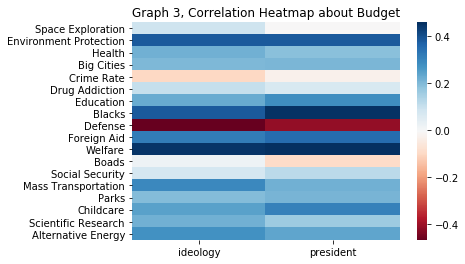

In [6]:
plot_graph_3()

However, while the correlation heatmap can summary lots of important information, it *cannot* show whether a cell has deeper color (i.e. matters to ideology and president preference) because Conservatives care about this topic a lot or Conservatives care about it, or both. As shown in the graphs in Lab Notebook, welfare and foreign aid are topics that only Conservatives care a lot about—and they think the government has spent too much on them. Improving the conditions of Blacks and development alternative energy sources, however, are topics that only Liberals care a lot about—and they think the government has spent too little on them. On the contrary, the topic about military, armaments, and defense triggers both Liberals and Conservatives: the former thinks the government spent too much on it, and the latter thinks the government spent too little. On other words, this is one of the eye-to-eye topics between Liberals and Conservatives. 
Also, it is just interesting to note how liberal and conservatives are quite similar in many topic issues. They both think that the government is spending too little on social security, roads, childcare, education system, dealing with drug addiction, halting the rising crime rate, solving the problems of the big cities, as well as improving and protecting the nation’s health.   

There can be two interpretations on this observation. First, the wording of the questions might be a bit tricky. For example, it is not quite clear what it means when the survey asks the respondents what they think about the government spending on improving and protecting the nation’s health. It is not clear what kind of government spending on public health is: Liberals might interpret it as certain healthcare programs, and Conservatives might interpret it as simply investing in health-related research. Therefore, although it is true that they think the government should spend more on improving and protecting the nation’s health, Liberals and Conservatives differ in what specific policies they support. 
Second, topics such as road infrastructure and solving the problems of the big cities are just quite bipartisan. They probably represent the potential topics that people from opposite ideologies can actually cooperate together to bring some effective changes.